In [ ]:
#Basic imports
from sys import argv, stdout

#To save training data
from pickle import dump as pickle_dump

#Local imports
from common import constants
from models import cnn_gray_model_1
from model_utils import get_input_labels, get_label_ids, model_fit
from utils import list_files

batch_size = 16
n_images = 200
n_epochs = 30
o_model = "model_1"
l_rate = 0.001

dataset = "train"
validation_split = 0.2
input_shape = constants.IMG_SHAPE
source_loc = constants.PROCESSED_DATASET_MAPPINGS[dataset]

input_labels = get_input_labels()
label_ids = get_label_ids()
num_classes = len(label_ids)
input_set = list_files(source_loc, n_images)

#Output model file
model_file = "{o_model}.h5".format(o_model = o_model)

#Initialize the model
model = cnn_gray_model_1(input_shape, num_classes, l_rate)
model.summary()

#Train the model
history = model_fit(model, source_loc, input_set, input_labels, label_ids, batch_size, n_epochs, validation_split)

#Output model file
model_file = "{o_model}.h5".format(o_model = o_model)
history_file = "{o_model}.hist".format(o_model = o_model)

#Save model data
print("Saving model: {model_file} and history: {history_file}".format(model_file = model_file, history_file = history_file))
model.save(model_file, overwrite=True)

with open(history_file, 'wb') as handle:
    pickle_dump(history.history, handle)

In [ ]:
from visualization import plot
from matplotlib import pyplot as plt
import numpy as np
from pickle import load as pickle_load

o_model = "model_1"
history_file = "{o_model}.hist".format(o_model = o_model)

history = None
with open(history_file, 'rb') as handle:
    history = pickle_load(handle)

figure, axes = plt.subplots(figsize = (5, 3))

#Set axes data
axes.plot(history['acc'])
axes.plot(history['val_acc'])

axes.set_title('Training and validation accuracies')
axes.set_ylabel('Accuracy')
axes.set_xlabel('Epoch')
axes.legend(['Train', 'Validation'], loc='upper left')

In [3]:

#Command line parameters
from sys import argv

#Load training history
from pickle import load as pickle_load

#Load keras model
from keras.models import load_model

%matplotlib notebook

model_name = "model_1"
history_file = "{model_name}.hist".format(model_name = model_name)
model_file = "{model_name}.h5".format(model_name = model_name)

print("Using model: {model_file} history: {history_file}".format(model_file = model_file, history_file = history_file))

model = load_model(model_file)

history = None
with open(history_file, 'rb') as handle:
    history = pickle_load(handle)

Using model: model_1.h5 history: model_1.hist


<IPython.core.display.Javascript object>


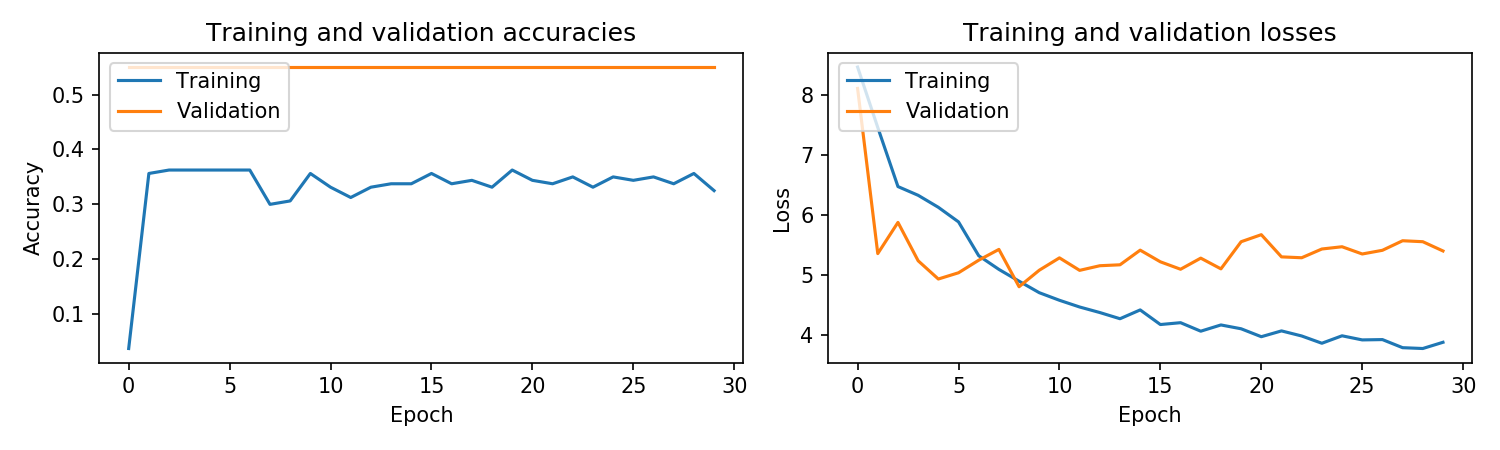

In [5]:
from visualization import TrainingInsights

insights = TrainingInsights(model, history)
insights.accuracy()
insights.loss()

In [ ]:
def display_img(source_path, label_dict, num_files = 10):
    files = list(label_dict.keys())[:num_files]

    x = load_dataset(source_path, files)
    x = to_grayscale(x)

    y = [CLASS_NAME_MAP[LABEL_DICT[image]] for image in files]
    y = to_categorical(y, num_classes = NUM_CLASSES)

    #Print sample
    plt.figure()

    print(x[3])
    plt.imshow(x[0], cmap='gray')
    #plt.imshow(cvtColor((x[4]).astype('uint8'), COLOR_BGR2RGB)) #SAMPLE_IMG_ID

    print(y[4])

In [ ]:
files = list(LABEL_DICT.keys())[:10]

x = load_dataset(TRAIN_SET_LOC, files)
x = to_grayscale(x)

y = [CLASS_NAME_MAP[LABEL_DICT[image]] for image in files]
y = to_categorical(y, num_classes = NUM_CLASSES)

#Print sample
plt.figure()

print(x[3])
plt.imshow(x[0], cmap='gray')
#plt.imshow(cvtColor((x[4]).astype('uint8'), COLOR_BGR2RGB)) #SAMPLE_IMG_ID

print(y[4])

In [ ]:
### Create the model ###
model = Sequential()

input_shape = IMG_SIZE

model.add(MaxPool2D((5, 5), (2, 2), 'valid', input_shape=input_shape))

model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D((5, 5), (2, 2), 'valid'))

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPool2D((5, 5), (2, 2), 'valid'))

model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D((5, 5), (2, 2), 'valid'))

model.add(Conv2D(8, kernel_size=3, activation='relu'))
model.add(MaxPool2D((5, 5), (2, 2), 'valid'))

model.add(Conv2D(4, kernel_size=3, activation='relu'))
model.add(MaxPool2D((5, 5), (2, 2), 'valid'))

model.add(Flatten())
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Print model summary
print(model.summary())

#Train the model
files = list(LABEL_DICT.keys())[:5096]
batch_size = 16
model.fit_generator(
    load_model_data(TRAIN_SET_LOC, files, 16, CLASS_NAME_MAP, LABEL_DICT, NUM_CLASSES),
    epochs = 20, 
    steps_per_epoch = len(files)/batch_size + 1, 
    use_multiprocessing = True)
"""
for files in batch(list(LABEL_DICT.keys()), 256):
    x, y = load_image_set(TRAIN_SET_LOC, files, CLASS_NAME_MAP, LABEL_DICT, NUM_CLASSES)
    model.fit(x, y, batch_size = 16, validation_split = 0.2, epochs=3)
"""

#VG(model_to_dot(model).create(prog='dot', format='s

In [ ]:
#Scratch
#img = imread(locate_train_img("0000e88ab.jpg"))

In [ ]:
print(X_TRAIN.shape)